**Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

Here you will be learning how to do data cleaning.

In [77]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [79]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('/content/drive/Shareddrives/10 Academy/Intensive training/Batch 6/Content-B6/Week-1/data/diabetic_data.csv', na_values=['?', None])
# db = pd.read_csv('<path-to-your-csv-inside-your-drive>',  na_values=['?', None])
db.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [80]:
# column names
db.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [81]:
len(db.columns)

50

In [83]:
db.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

For better understanding of the columns, exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [84]:
db.shape

(101766, 50)

In [ ]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 101766 rows and 50 columns


In [87]:
db.isnull().sum().sum()

374017

## Handling Missing Values

In [88]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 7.35 % missing values.


In [ ]:
# Now which column(s) has missing values
db.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

> In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero. The data on the left will be equal to the data on the right side. 
 
> When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.

> When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve. In this type of distribution the mean, median, and mode of the distribution are negative rather than positive or zero.

> When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve. In this type of distribution the mean, median, and mode of the distribution are positive rather than negative or zero.

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Tip:
 There are different ways to look/measure the skewness of a data in pandas dataframe:
 One way is to calculate the skewness of a column:
 

```
df.skew(axis=0)
```



In [89]:
db.skew(axis=0)

encounter_id                 0.699142
patient_nbr                  0.471281
admission_type_id            1.591984
discharge_disposition_id     2.563067
admission_source_id          1.029935
time_in_hospital             1.133999
num_lab_procedures          -0.236544
num_procedures               1.316415
num_medications              1.326672
number_outpatient            8.832959
number_emergency            22.855582
number_inpatient             3.614139
number_diagnoses            -0.876746
dtype: float64

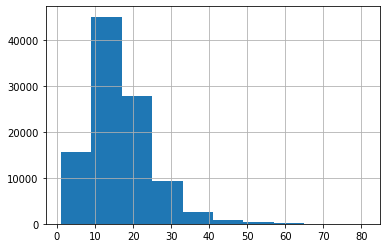

In [92]:
db['num_medications'].hist()

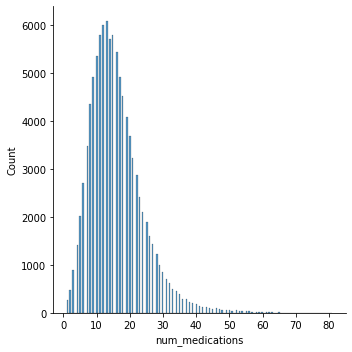

In [94]:
import seaborn as sns
sns.displot(data=db, x=db['num_medications'])

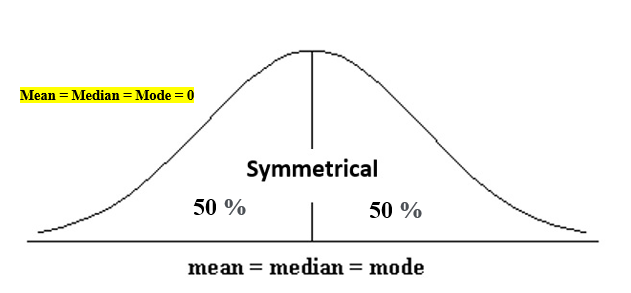

In [ ]:
# Normal Distribution
Image(filename='/content/drive/MyDrive/normal.png')

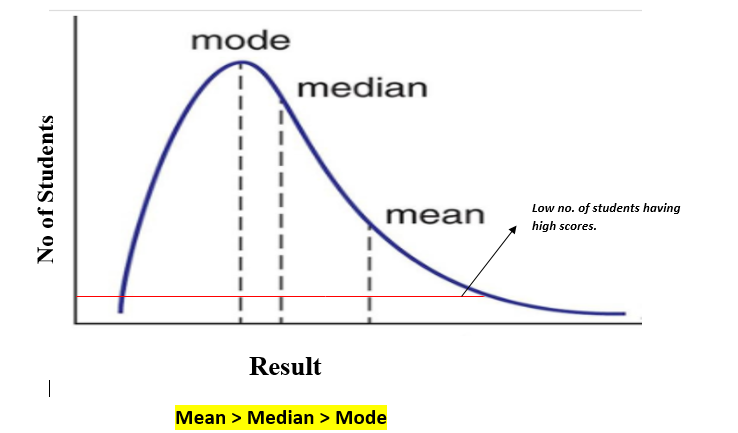

In [ ]:
# Positively skewed Distribution
Image(filename='/content/drive/MyDrive/positivelySkewed.png')

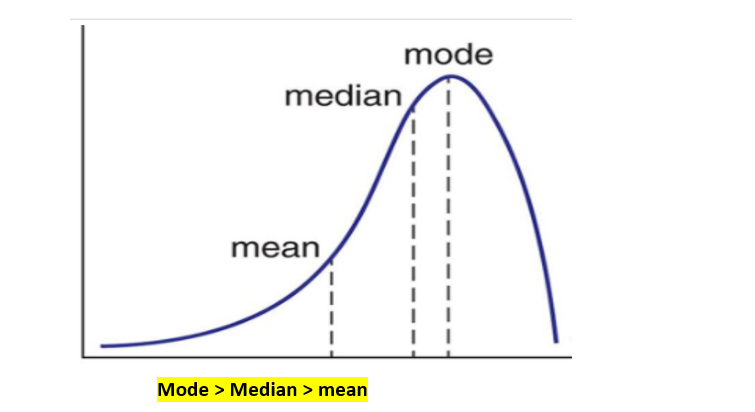

In [ ]:
# Negatively skewed Distribution
Image(filename='/content/drive/MyDrive/negativelySkewed.png')

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [ ]:
# drop columns with more than 30% missing values
df_clean = db.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis=1)
df_clean.shape

(101766, 45)

In [ ]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

It is also possible to fillna with interploate method. Fill NaN values using an interpolation method. Based on the approach/method used, Interpolate will try to determine any missing values.

df.interpolate(inplace=True)

Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons  

## Transforming Data
Feature scaling

**Standardization and Normalization**

### Why do we need feature scaling?

Machine learning algorithm just sees number â€” if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.



In unsupervised learning like KNN or K-means clustering, the algorithms are based on calculating the eculidean distance between the magnitudes of the features, if not scaled, the feature with a higher value range starts dominating when calculating distances.

In other algorithms like deep learning, they are based on finding the global minma on each iteration and varying amount of magnitudes with higher value will make the convergence slower.

Normalization vs. Standardization: What's the difference?

One of the reasons that it's easy to get confused between standardization and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - standardization transforms data to have a mean of zero and a standard deviation of 1, while
    - Normalization involves adjusting values measured on different scales to a common scale(0 - 1)

Standardization

Standardization scales down features based on the standard normal distribution. So all features will now have the properties of a standard normal distribution. Helps to handle outliers. In general, you'll standardize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)





In [95]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
99,226.972512
149,102.587705
321,157.802232
1586,302.361397
661,583.947110


In [96]:
original_data[0].min(), original_data[0].max()

(0.018522550908136783, 1418.2224701138803)

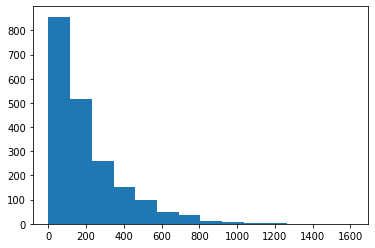

In [ ]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

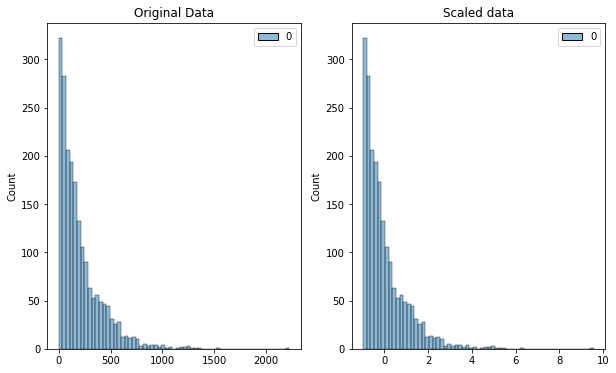

In [69]:
from sklearn.preprocessing import StandardScaler
def standard_scaler(df):
    s_scaler = StandardScaler()
    scaled_data = s_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
standard_scaler(original_data)

Normalization

Normalization is the process of converting a numerical feature into a standard range of values.The range of values might be either [-1, 1] or [0, 1].

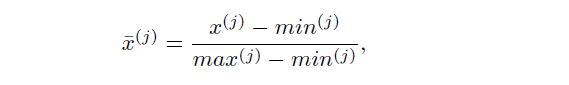

Min Value:  0.0
Max value:  1.0


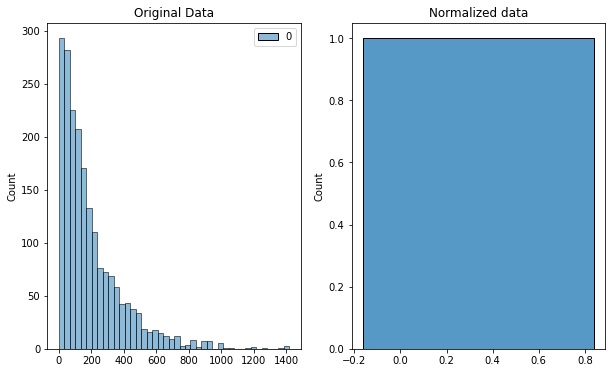

In [97]:
from sklearn.preprocessing import MinMaxScaler
def normalizer(df):
  minmax_scaler = MinMaxScaler()
  tr = minmax_scaler.fit_transform(df)
  print("Min Value: ",tr.min())
  print("Max value: ",tr.max())
  # plot both together to compare
  fig, ax=plt.subplots(1,2, figsize=(10, 6))
  sns.histplot(df, ax=ax[0])
  ax[0].set_title("Original Data")
  sns.histplot(tr[0], ax=ax[1])
  ax[1].set_title("Normalized data")
normalizer(original_data)


In [ ]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [ ]:
df_clean['diag_1'] = pd.to_numeric(df_clean['diag_1'], errors='coerce')
df_clean['diag_2'] = pd.to_numeric(df_clean['diag_2'], errors='coerce')
df_clean['diag_3'] = pd.to_numeric(df_clean['diag_3'], errors='coerce')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_lab_procedures        101766 non-null  int64  
 10  num_procedures            101766 non-null  int64  
 11  num_medications           101766 non-null  int64  
 12  number_outpatient         101766 non-null  int64  
 13  number_emergency          101766 non-null  i

In [ ]:
df_clean['fix_age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [ ]:
   
df_clean['age'] = [ ((int(i.split('-')[0]) + int(i.split('-')[1])) / 2)  for i in df_clean['fix_age']]

## Utility Functions

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

## Extracting Data

In [ ]:
db['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
percent_missing(df_clean)

The Diabetes dataset contains 0.0 % missing values.


In [ ]:
missing_values_table(df_clean)

Your selected dataframe has 46 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
diag_3,5131,5.00,float64
diag_2,2538,2.50,float64
diag_1,1645,1.60,float64


In [ ]:
def map_readmitted(col):
    readmitted_map = {'NO' : 'NO', '>30': 'YES', '<30': 'YES'}
    return col.map(readmitted_map)

db['fix_readmitted'] = map_readmitted(db['readmitted'])

In [ ]:
# unique encounter id
db['change'].unique()

array(['No', 'Ch'], dtype=object)

In [ ]:
db.shape

(101766, 50)

In [ ]:
pd.set_option('max_column', None)
df = pd.read_excel("/content/drive/Shareddrives/10 Academy/Intensive training/Batch 6/Content-B6/Week-1/data/Week1_challenge_data_source.xlsx", engine = 'openpyxl')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
